# Probabilities and Statistics
Probability theory provide a way to measure _uncertainty_ for example if we toss a count the probability of the result is of $1/2$, meanwhile __statistics__ are empirical quantities that are computed as functions of the observed data. Design _estimators_ that given a dataset produce _estimates_ of model parameters such as probabilities

When these estimators satisfy _consistency_ our estimates will converge to the corresponding probability

In [16]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
import matplotlib.pyplot as plt

`random.random` yields numbers in the interval [0,1] where the probability in any sub-interval $[a,b] \in [0,1]$ is equeal to $b-a$. Thus we can get out $0$ and $1$ with probability of $0.5$ each 

In [6]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads

print(f"Heads: {heads}\nTails:{tails}")

Heads: 49
Tails:51


WE can simulate multiple draws from any variable with a finite number of possible outcomes by calling the multinomial function.
- first argument: number of draws
- second: list of probabilities associated with each of the possible outcomes.
 

In [13]:
fair_probs = torch.tensor([0.5, 0.5]) # probability vector index 0 -> heads, 1 -> tails
Multinomial(100, fair_probs).sample()

tensor([63., 37.])

In [14]:
Multinomial(100, fair_probs).sample() / 100 # frequency of each outcome in data

tensor([0.4900, 0.5100])

Let's see what happens if we only see the outcome.

In [15]:
counts = Multinomial(10000, fair_probs).sample()
counts/10000

tensor([0.4947, 0.5053])

In general for averages of repeated events (like coin tosses) as the number of repetitions grows, our estimates are guaranteed to converge to the true underlying probs. The _central limit theorem_ tell us that in many situations as the sample size $n$ grows these errors should go down at a rate of ($1/\sqrt{n}$).

Intuition by studyng how our estimate evolves as we grow the number of tosses from 1 to 10,000

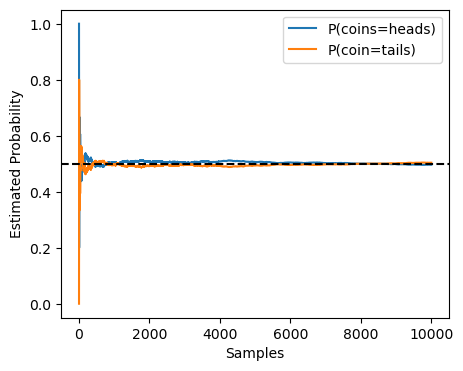

In [19]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)
estimates = estimates.numpy()

plt.rcParams['figure.figsize'] = (5,4)
plt.plot(estimates[:, 0], label=("P(coins=heads)"))
plt.plot(estimates[:, 1], label=("P(coin=tails)"))
plt.axhline(y=0.5, c='0', ls='dashed')
plt.legend()
plt.gca().set_xlabel('Samples')
plt.gca().set_ylabel('Estimated Probability')
plt.show()


As we get more data by conducting more experiments, the curves converge towds the true probability